In [2]:
import matplotlib.pyplot as plt
from collections import defaultdict
import csv

In [3]:
newberg_results_csv = 'newberg_results_for_figs.csv'

In [4]:
acc = defaultdict(list)
models = []

with open(newberg_results_csv) as f:
    reader = csv.DictReader(f)
    
    for row in reader:
        model = row['Model']
        models.append(model)
        for key in ("Overall","Curb Ramp","Missing Ramp","Obstruction","Sfc Problem","Null"):
            acc[key].append( float(row[key]) )

In [5]:
models

['Trained on DC',
 'Trained on DC+Newberg',
 'Trained on Newberg',
 'Trained on Newberg, init with DC']

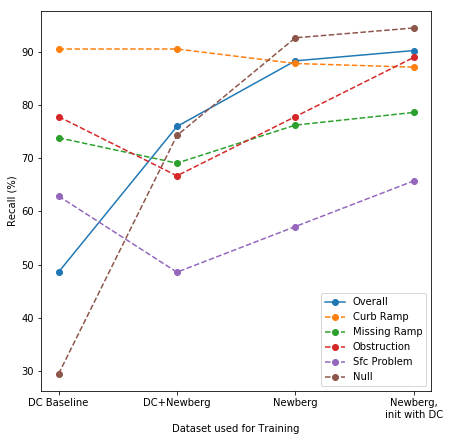

In [6]:
fancy_models = ['DC Baseline', 'DC+Newberg', 'Newberg', 'Newberg,\ninit with DC']

plt.figure(figsize=(7,7))
for label in ('Overall', 'Curb Ramp', 'Missing Ramp', 'Obstruction', 'Sfc Problem', 'Null'):
    line   = 'dashed' if label != 'Overall' else 'solid'
    plt.plot(fancy_models, acc[label], label=label, linestyle=line, marker='o')
plt.xlabel("Dataset used for Training")
plt.ylabel('Recall (%)')
#plt.title("Accuracy on Newberg Data as a function of Training Data")
plt.legend()

plt.show()

In [11]:
seattle_results_csv = 'seattle_results_for_figs_new.csv'
acc = defaultdict(list)
models = []

with open(seattle_results_csv) as f:
    reader = csv.DictReader(f)
    
    for row in reader:
        model = row['Model']
        models.append(model)
        for key in ("Overall","Curb Ramp","Missing Ramp","Obstruction","Sfc Problem","Null"):
            acc[key].append( float(row[key]) )

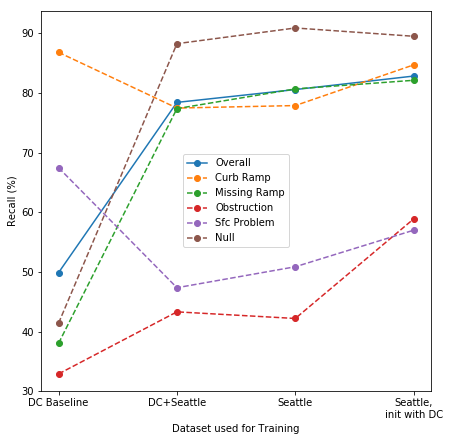

In [13]:
fancy_models = ['DC Baseline', 'DC+Seattle', 'Seattle', 'Seattle,\ninit with DC']

plt.figure(figsize=(7,7))
for label in ('Overall', 'Curb Ramp', 'Missing Ramp', 'Obstruction', 'Sfc Problem', 'Null'):
    line   = 'dashed' if label != 'Overall' else 'solid'
    plt.plot(fancy_models, acc[label], label=label, linestyle=line, marker='o')
plt.xlabel("Dataset used for Training")
plt.ylabel('Recall (%)')
plt.legend()

plt.show()

In [44]:
def plot_results(path_to_results, name, save=False):
    acc = defaultdict(list)
    models = []

    with open(path_to_results) as f:
        reader = csv.DictReader(f)

        for row in reader:
            model = row['Model']
            models.append(model)
            for key in ("Overall","Curb Ramp","Missing Ramp","Obstruction","Sfc Problem","Null"):
                acc[key].append( float(row[key]) )
                
    fancy_models = ['DC Baseline', 'DC+{}', '{}', '{},\ninit with DC']
    fancy_models = map(lambda x: str.format(x, name), fancy_models)

    plt.figure(figsize=(7,7))
    for label in ('Curb Ramp', 'Missing Ramp', 'Obstruction', 'Sfc Problem', 'Null', 'Overall'):
        style = {"linestyle"   : 'dashed' if label != 'Overall' else 'solid',
                 "marker"      : 'o',
                 "linewidth"   : 1 if label != 'Overall' else 3,
                 "label"       : label
                }
        if label == "Overall":
            style['color'] = 'black'
        plt.plot(fancy_models, acc[label], **style)
    plt.xlabel("Dataset used for Training")
    plt.ylabel('Recall (%)')
    plt.ylim((0,100))
    plt.legend()
    
    if save:
        savename = "{}_acc".format(name.lower())
        plt.savefig('/Users/galenweld/Desktop/{}.png'.format(savename), dpi = 300)

    plt.show()

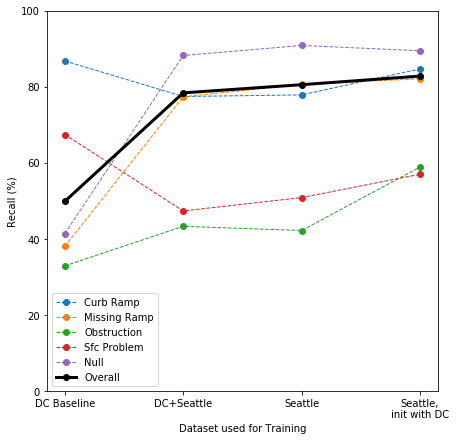

In [45]:
plot_results('seattle_results_for_figs_new.csv', "Seattle", save=True)

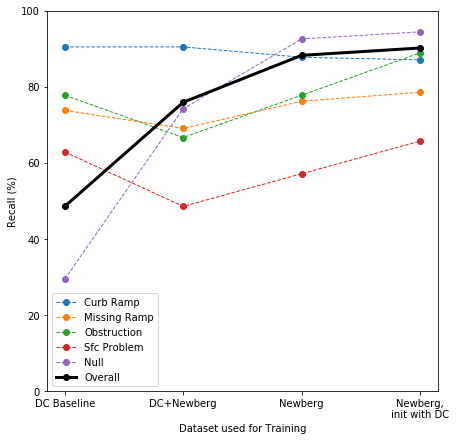

In [46]:
plot_results('newberg_results_for_figs.csv', "Newberg", save=True)